In [2]:
from utils.labels import compute_stai_scores, compute_stai_labels, plot_STAI_scores


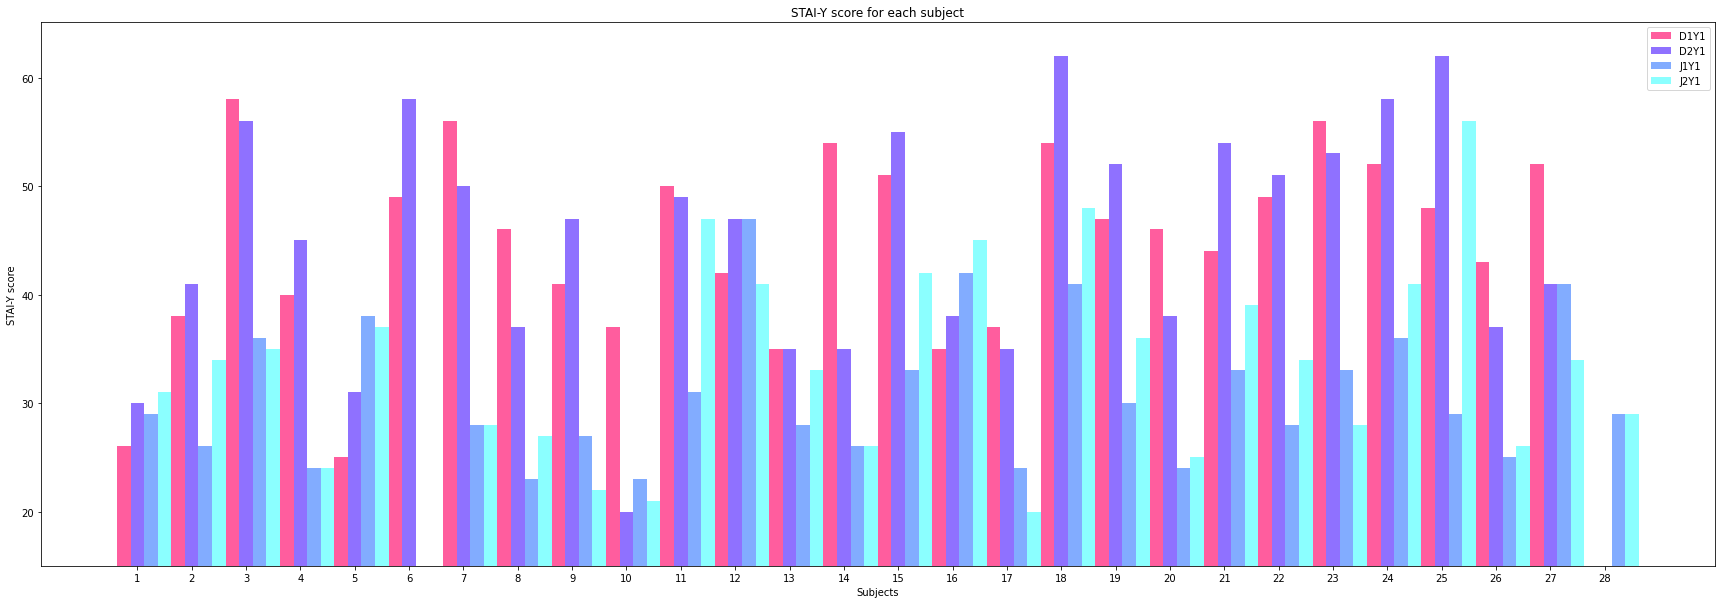

In [3]:
scores = compute_stai_scores()
scores


plot_STAI_scores(scores)

In [3]:
labels = compute_stai_labels(scores, 40)
labels

{'P001_S001_001': 0,
 'P001_S001_002': 0,
 'P001_S002_001': 0,
 'P001_S002_002': 0,
 'P002_S001_001': 0,
 'P002_S001_002': 1,
 'P002_S002_001': 0,
 'P002_S002_002': 0,
 'P003_S001_001': 1,
 'P003_S001_002': 1,
 'P003_S002_001': 0,
 'P003_S002_002': 0,
 'P004_S001_001': 1,
 'P004_S001_002': 1,
 'P004_S002_001': 0,
 'P004_S002_002': 0,
 'P005_S001_001': 0,
 'P005_S001_002': 0,
 'P005_S002_001': 0,
 'P005_S002_002': 0,
 'P006_S001_001': 1,
 'P006_S001_002': 1,
 'P006_S002_001': 0,
 'P006_S002_002': 0,
 'P007_S001_001': 1,
 'P007_S001_002': 1,
 'P007_S002_001': 0,
 'P007_S002_002': 0,
 'P008_S001_001': 1,
 'P008_S001_002': 0,
 'P008_S002_001': 0,
 'P008_S002_002': 0,
 'P009_S001_001': 1,
 'P009_S001_002': 1,
 'P009_S002_001': 0,
 'P009_S002_002': 0,
 'P010_S001_001': 0,
 'P010_S001_002': 0,
 'P010_S002_001': 0,
 'P010_S002_002': 0,
 'P011_S001_001': 1,
 'P011_S001_002': 1,
 'P011_S002_001': 0,
 'P011_S002_002': 1,
 'P012_S001_001': 1,
 'P012_S001_002': 1,
 'P012_S002_001': 1,
 'P012_S002_0

Denne funker for labels:

 labels = {}
    for i in range(n_subjects):
        for j in range(n_sessions*n_runs):
            invalid_flag = False
            scores = scores_df.iloc[i, j+1] #need j+1 because it took in subject number as first value
            if scores == 0: 
                invalid_flag = True
            elif scores < cutoff:
                label = 0
            else:
                label = 1

            if not invalid_flag:
                subject = i + 1
                session = j//n_runs + 1 
                run = j % n_runs + 1
                key = f'P{str(subject).zfill(3)}_S{str(session).zfill(3)}_{str(run).zfill(3)}'
                labels[key] = label
            else:
                print('Invalid')
    return labels

Testing:
num_runs = 2
num_sessions = 2
a = (num_runs*num_sessions)

for j in range(num_runs*num_sessions):
    session = j // num_runs + 1
    run = j % num_runs + 1
    print('Ses: ', session, ' Run: ', run)